In [ ]:
# Import necessary libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# 1. New York City Bike Parking

In [ ]:
# Import the Bike Parking data set.
ny_parking_raw = pd.read_csv('NYC_BicycleParking.csv')
ny_parking_raw.head()

In [ ]:
# Sense check the DataFrame.
ny_parking_raw.info()

In [ ]:
# Extract columns to create a new DataFrame.
ny_parking_df = ny_parking_raw.loc[:,['OBJECTID','BoroName','IFOADDRESS','PROGRAM','ASSETSUBTY']]
ny_parking_df.head()

In [ ]:
# Check missing values.
ny_parking_df.isna().sum()

In [ ]:
# Remove missing values, then sense check DataFrame.
ny_parking_clean = ny_parking_df.dropna()
ny_parking_clean.info()

In [ ]:
# Add a new column to reflect the count of each object.
ny_parking_clean = ny_parking_clean.assign(ASSETCOUNT='1')

In [ ]:
# Change the column datatype to integer.
ny_parking_clean['ASSETCOUNT']=ny_parking_clean['ASSETCOUNT'].astype(int)
ny_parking_clean.head()

## 1.1 Bike Parking Infrastructure Count by Type and Borough

In [ ]:
# Group the DataFrame by borough names and asset types, sum up to get total count of the assets.
ny_parking_gp = ny_parking_clean.groupby(['BoroName','ASSETSUBTY'])[['ASSETCOUNT']].sum()
ny_parking_gp = ny_parking_gp.reset_index()
ny_parking_gp = ny_parking_gp.sort_values('ASSETCOUNT', ascending=False)
ny_parking_gp

In [ ]:
# Set plot size.
plt.figure(figsize=(12, 8), dpi=150)

# Create a barplot.
ax = sns.barplot(x='BoroName', y='ASSETCOUNT', hue='ASSETSUBTY', data=ny_parking_gp, ci=None)

plt.title("New York City - Bike Parking Infrastructure Count by Borough")
plt.xlabel('Borough')
plt.ylabel('Bike Parking Infrastructure Count')

ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels)

for i in ax.containers:
    ax.bar_label(i,padding =3,fontsize=6)

## 1.2 Bike Parking Infrastructure Count by Borough

In [ ]:
# Group the DataFrame by borough names, sum up to get total count of the assets.
ny_parking_ttl = ny_parking_clean.groupby(['BoroName'])[['ASSETCOUNT']].sum()
ny_parking_ttl = ny_parking_ttl.reset_index()
ny_parking_ttl = ny_parking_ttl.sort_values('ASSETCOUNT', ascending=False)
ny_parking_ttl

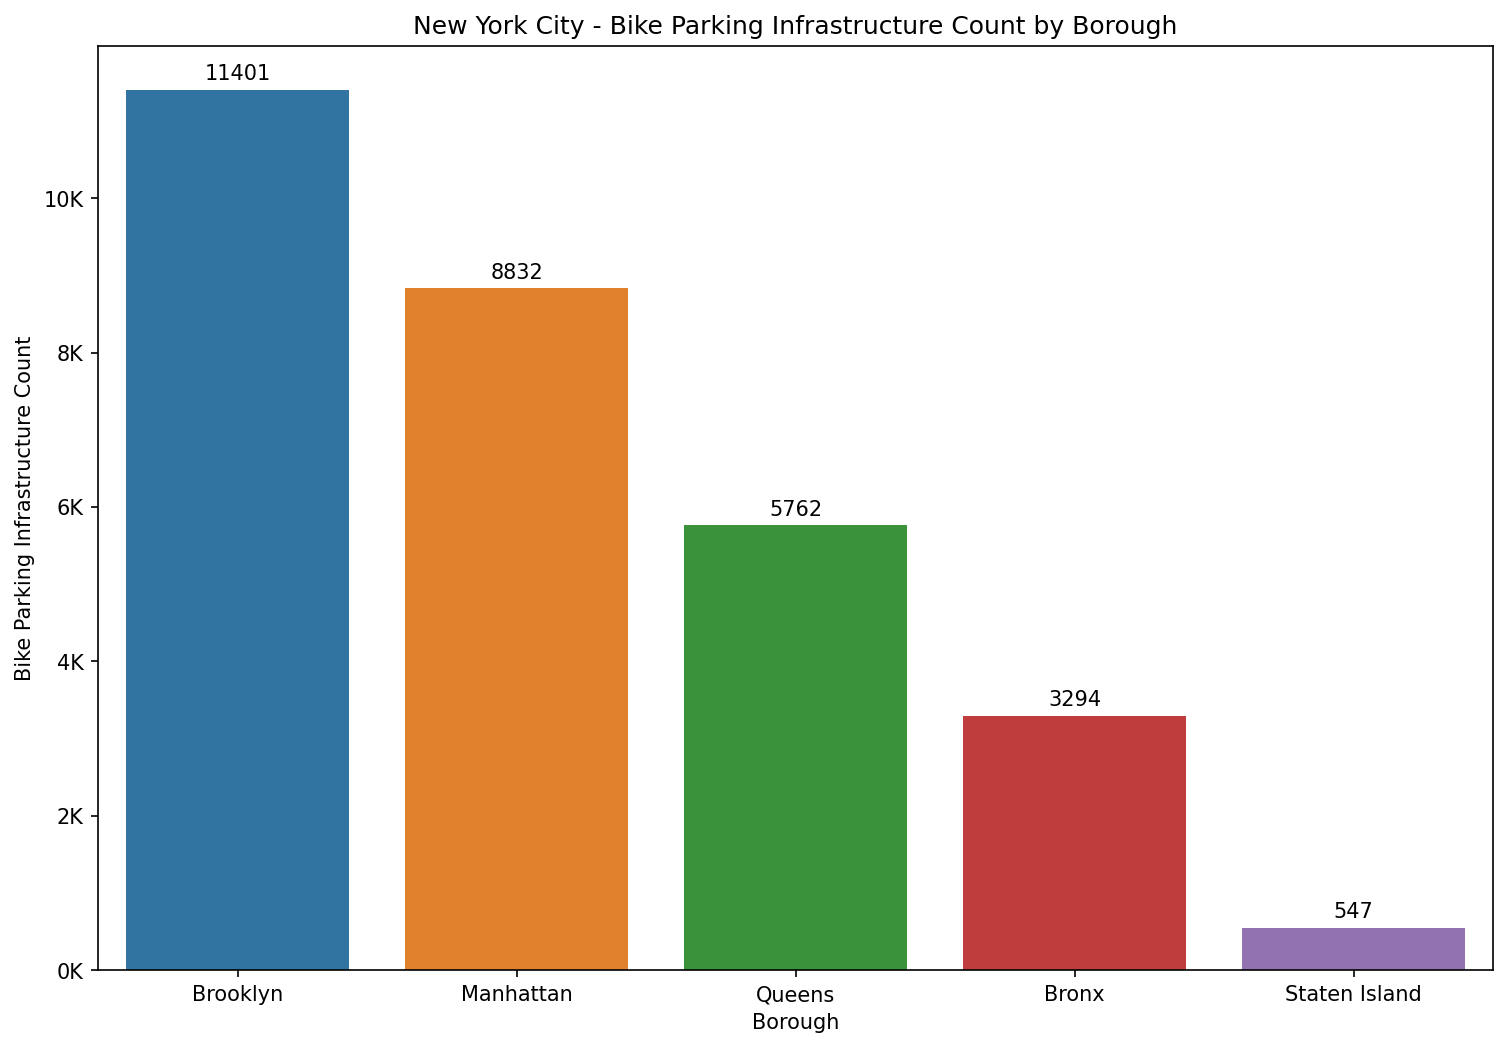

In [31]:
# Set plot size.
plt.figure(figsize=(12, 8), dpi=150)

# Create a barplot.
ax = sns.barplot(x='BoroName', y='ASSETCOUNT', data=ny_parking_ttl, ci=None)

plt.title("New York City - Bike Parking Infrastructure Count by Borough")
plt.xlabel('Borough')
plt.ylabel('Bike Parking Infrastructure Count')

ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels)

for i in ax.containers:
    ax.bar_label(i,padding =3)

# 2. New York City Cycle Count

In [ ]:
# Import the bicycle count data set.
ny_count_raw = pd.read_csv('NYC_Bicycle_Counts.csv',thousands=',')
ny_count_raw.head()

In [ ]:
# Check missing values.
ny_count_raw.isna().sum()

In [ ]:
# Sense check the DataFrame.
ny_count_raw.info()

In [ ]:
# Add new columns to reflect year, month and hour individually.
ny_count_sub = ny_count_raw.copy()
ny_count_sub['date'] = pd.to_datetime(ny_count_sub['date'])
ny_count_sub['year'] = pd.DatetimeIndex(ny_count_sub['date']).year
ny_count_sub['month'] = pd.DatetimeIndex(ny_count_sub['date']).month
ny_count_sub['starthour'] = ny_count_sub['date'].dt.hour
ny_count_sub = ny_count_sub[ny_count_sub['year']!=2023]
ny_count_sub.head()

## 2.1 Total Cycle Count by Year

In [38]:
# Extract columns to create new DataFrame.
ny_ycount = ny_count_sub.loc[:,['year', 'counts']]
ny_ycount.head()

,year,counts
0,2022,15
1,2022,12
2,2022,14
3,2022,5
4,2022,10


In [42]:
# Group data by year and month, sum up to get total cycle count.
ny_ycount_gp = ny_ycount.groupby(['year'])[['counts']].sum().reset_index()
ny_ycount_gp

,year,counts
0,2012,1611856
1,2013,323533
2,2014,9261909
3,2015,13797937
4,2016,16005658
5,2017,14481794
6,2018,12544736
7,2019,12346460
8,2020,13577322
9,2021,13690962


[Text(0, -2000000.0, '-2.0M'),
 Text(0, 0.0, '0.0M'),
 Text(0, 2000000.0, '2.0M'),
 Text(0, 4000000.0, '4.0M'),
 Text(0, 6000000.0, '6.0M'),
 Text(0, 8000000.0, '8.0M'),
 Text(0, 10000000.0, '10.0M'),
 Text(0, 12000000.0, '12.0M'),
 Text(0, 14000000.0, '14.0M'),
 Text(0, 16000000.0, '16.0M'),
 Text(0, 18000000.0, '18.0M')]

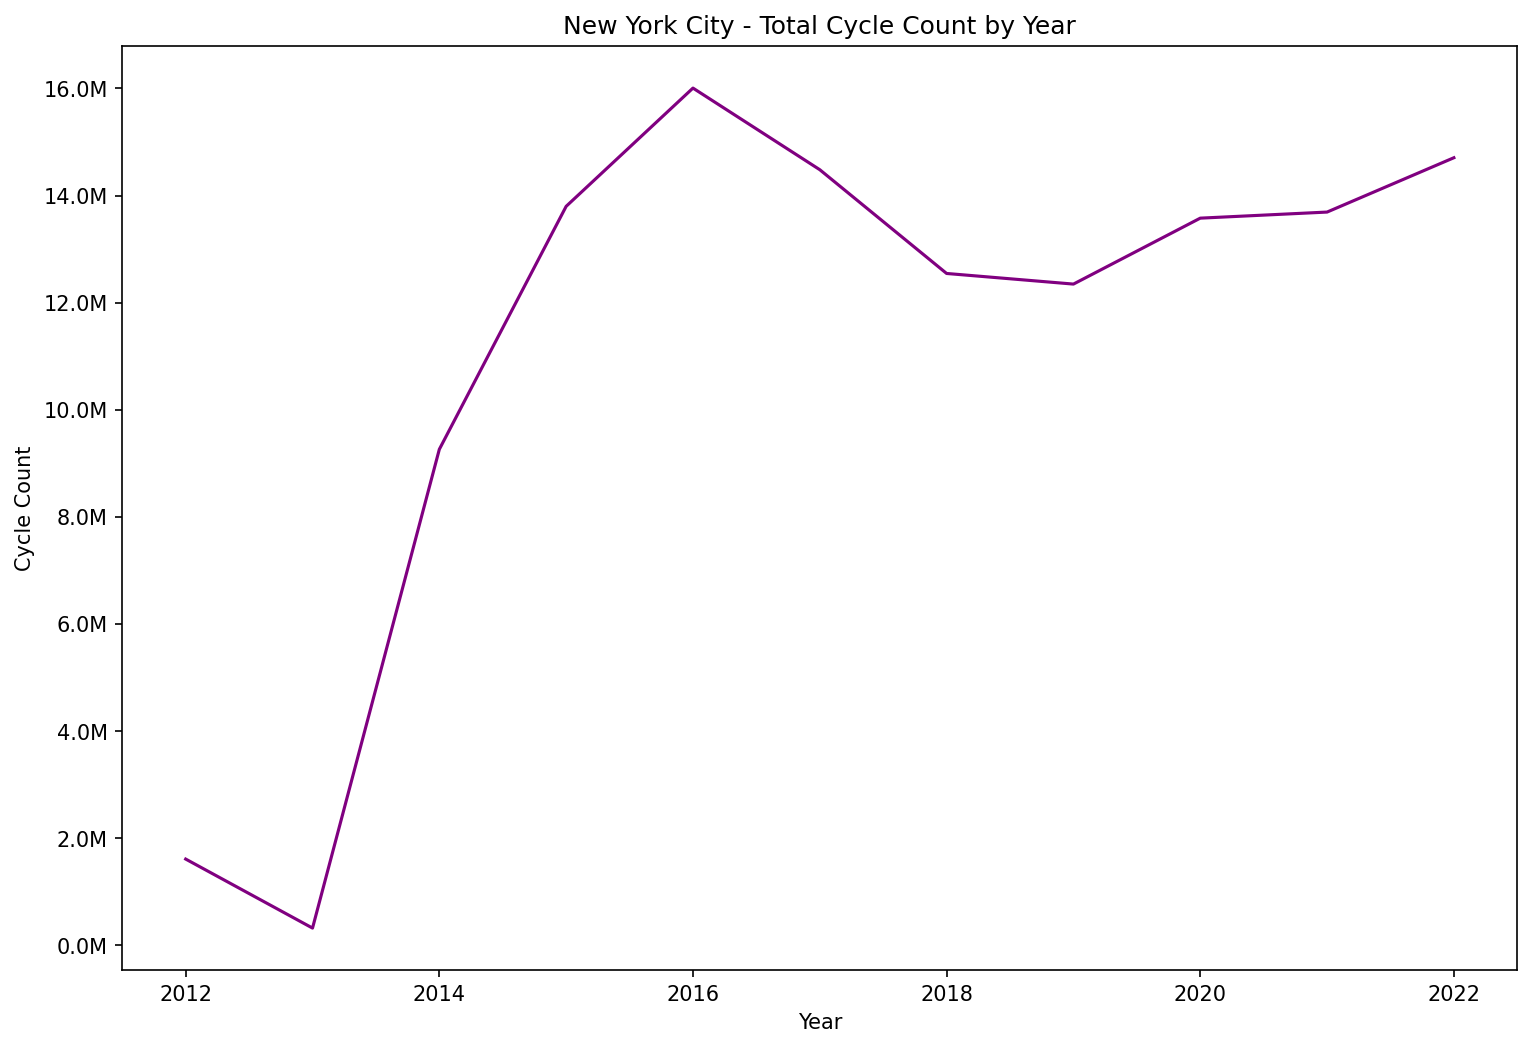

In [43]:
# Set plot size.
plt.figure(figsize=(12, 8), dpi=150)

# Create a lineplot.
ax = sns.lineplot(x='year', y='counts', data=ny_ycount_gp, color='purple', ci=None)

plt.title("New York City - Total Cycle Count by Year")
plt.xlabel('Year')
plt.ylabel('Cycle Count')

ylabels = ['{:,.1f}'.format(x) + 'M' for x in ax.get_yticks()/1000000]
ax.set_yticklabels(ylabels)

## 2.2 Total Cycle Count by Month

In [44]:
# Extract columns to create new DataFrame.
ny_mcount = ny_count_sub.loc[:,['year', 'month', 'counts']]

# Extract data from 2020 onwards.
ny_mcount = ny_mcount[ny_mcount['year']>=2020]
ny_mcount

,year,month,counts
0,2022,6,15
1,2022,6,12
2,2022,6,14
3,2022,6,5
4,2022,6,10
...,...,...,...
4489735,2022,12,13
4489736,2022,12,1
4489737,2022,12,3
4489738,2022,12,8


In [45]:
# Group data by year and month, sum up to get total cycle count.
ny_mcount_gp = ny_mcount.groupby(['year', 'month'])[['counts']].sum()
ny_mcount_gp.head()

counts
year month         
2020 1       739471
     2       667930
     3       839172
     4       647958
     5      1216375

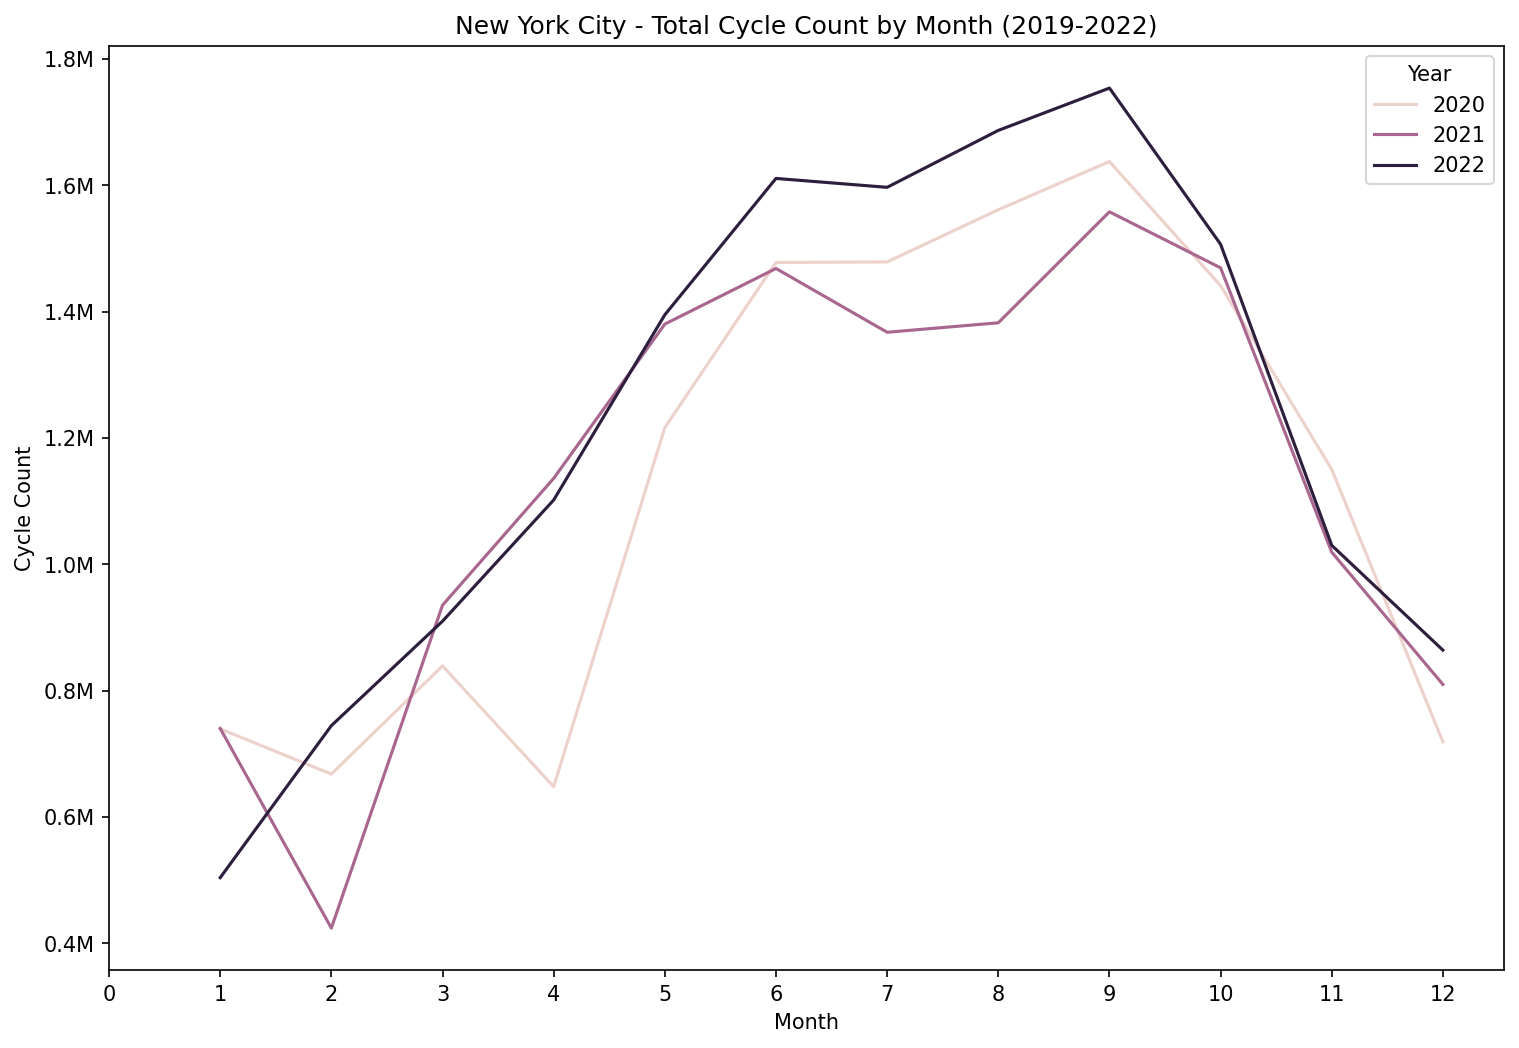

In [46]:
# Set plot size.
plt.figure(figsize=(12, 8), dpi=150)

# Create a lineplot.
ax = sns.lineplot(x='month', y='counts', hue='year',data=ny_mcount_gp, ci=None)

plt.title("New York City - Total Cycle Count by Month (2019-2022)")
plt.xlabel('Month')
plt.ylabel('Cycle Count')

ylabels = ['{:,.1f}'.format(x) + 'M' for x in ax.get_yticks()/1000000]
ax.set_yticklabels(ylabels)
ax.set_xticks(range(13))
plt.legend(title='Year', loc='best')

## 2.3 Total Cycle Count by Month of Year

In [53]:
# Extract columns to create new DataFrame.
ny_mycount = ny_count_sub.loc[:,['year', 'date', 'counts']]

# Add new column to reflect month/ year.
ny_mycount['date'] = ny_mycount['date'].dt.strftime('%m/%Y')

# Extract data from 2020 onwards.
ny_mycount = ny_mycount[ny_mycount['year']>=2020]
ny_mycount.head()

,year,date,counts
0,2022,06/2022,15
1,2022,06/2022,12
2,2022,06/2022,14
3,2022,06/2022,5
4,2022,06/2022,10


In [54]:
# Group data by month/ year, sum up to get total cycle count.
ny_mycount_gp = ny_mycount.groupby(['year','date'])[['counts']].sum().sort_values(['year','date'],ascending=True)
ny_mycount_gp

counts
year date            
2020 01/2020   739471
     02/2020   667930
     03/2020   839172
     04/2020   647958
     05/2020  1216375
     06/2020  1477949
     07/2020  1478836
     08/2020  1561429
     09/2020  1637764
     10/2020  1441249
     11/2020  1150208
     12/2020   718981
2021 01/2021   740164
     02/2021   424090
     03/2021   935302
     04/2021  1136093
     05/2021  1380366
     06/2021  1468442
     07/2021  1367450
     08/2021  1382417
     09/2021  1558189
     10/2021  1469433
     11/2021  1019215
     12/2021   809801
2022 01/2022   503867
     02/2022   744573
     03/2022   909984
     04/2022  1101825
     05/2022  1395108
     06/2022  1611004
     07/2022  1596933
     08/2022  1687048
     09/2022  1754061
     10/2022  1506750
     11/2022  1030037
     12/2022   864143

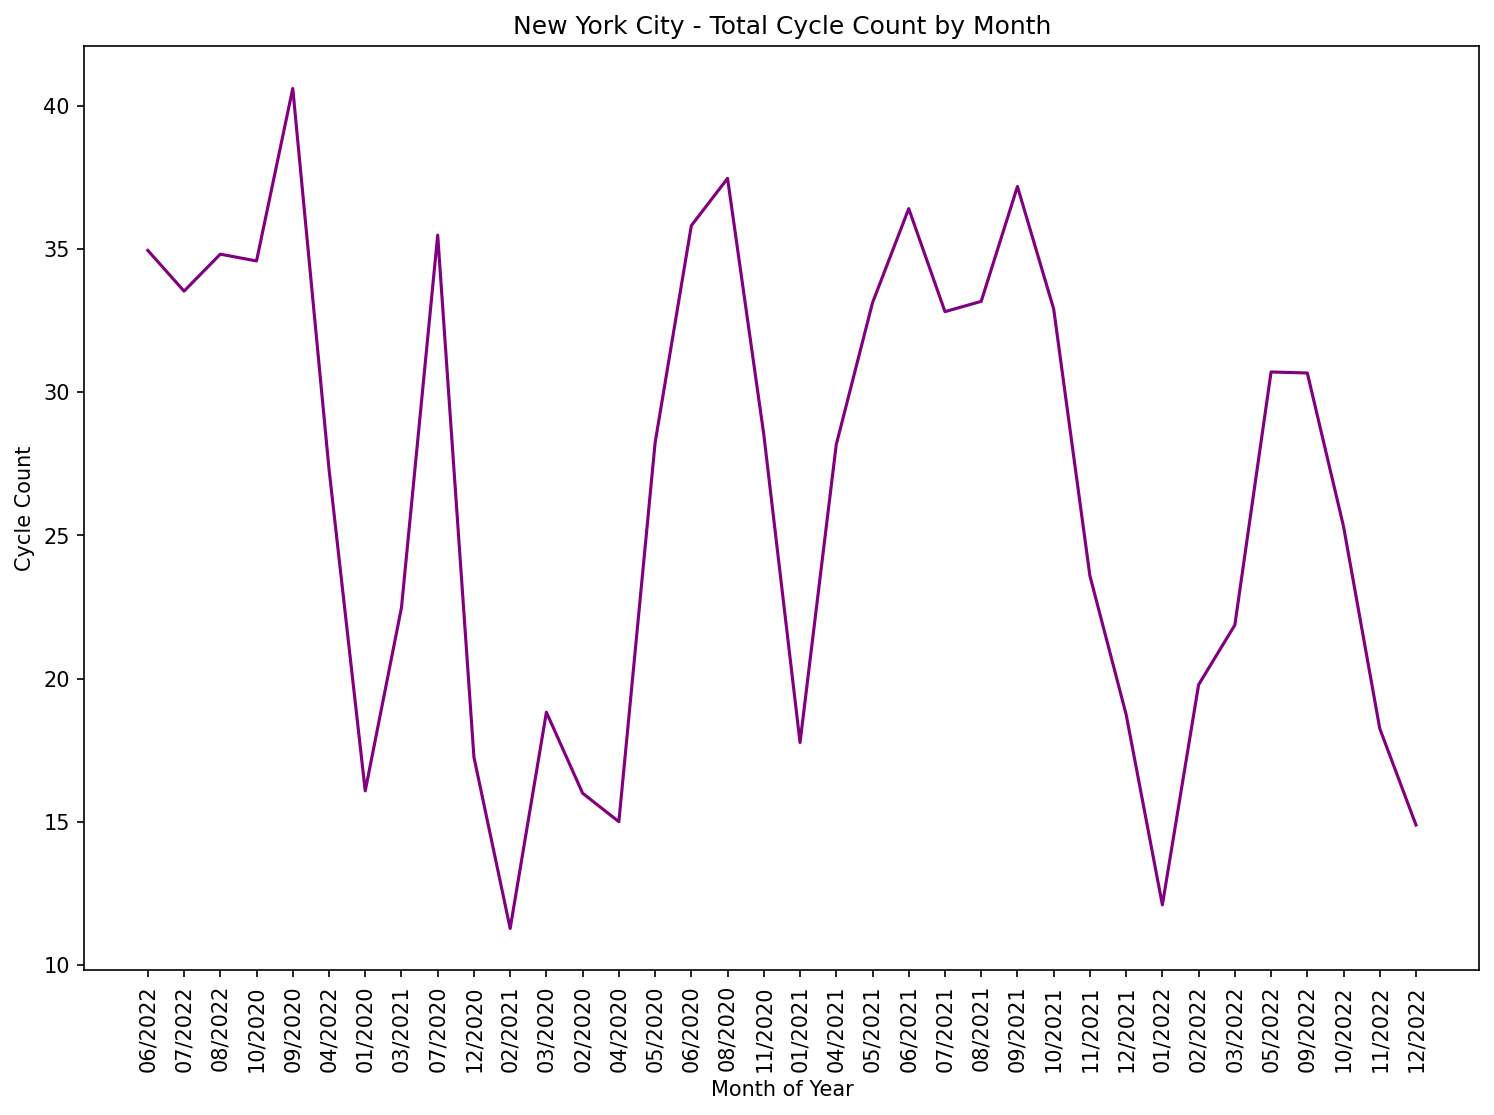

In [52]:
# Set plot size.
plt.figure(figsize=(12, 8), dpi=150)

# Create a lineplot.
ax = sns.lineplot(x='date', y='counts',data=ny_mycount, color='purple', ci=None)

plt.title("New York City - Total Cycle Count by Month")
plt.xlabel('Month of Year')
plt.ylabel('Cycle Count')
ax.tick_params(axis='x', rotation=90)

## 2.4 Total Cycle Count by Hour

In [55]:
# Extract columns to create new DataFrame.
ny_shcount = ny_count_sub.loc[:,['year', 'starthour', 'counts']]

# Extract data from 2020 onwards.
ny_shcount = ny_shcount[ny_shcount['year']>=2020]
ny_shcount

,year,starthour,counts
0,2022,0,15
1,2022,0,12
2,2022,0,14
3,2022,0,5
4,2022,1,10
...,...,...,...
4489735,2022,22,13
4489736,2022,23,1
4489737,2022,23,3
4489738,2022,23,8


In [56]:
# Group data by year and hour, sum up to get total cycle count.
ny_shcount_gp = ny_shcount.groupby(['year','starthour'])[['counts']].sum().sort_values(['year','starthour'],ascending=True)
ny_shcount_gp

counts
year starthour        
2020 0          162178
     1           83624
     2           48939
     3           32851
     4           37251
...                ...
2022 19         895481
     20         714451
     21         653158
     22         555634
     23         382330

[72 rows x 1 columns]

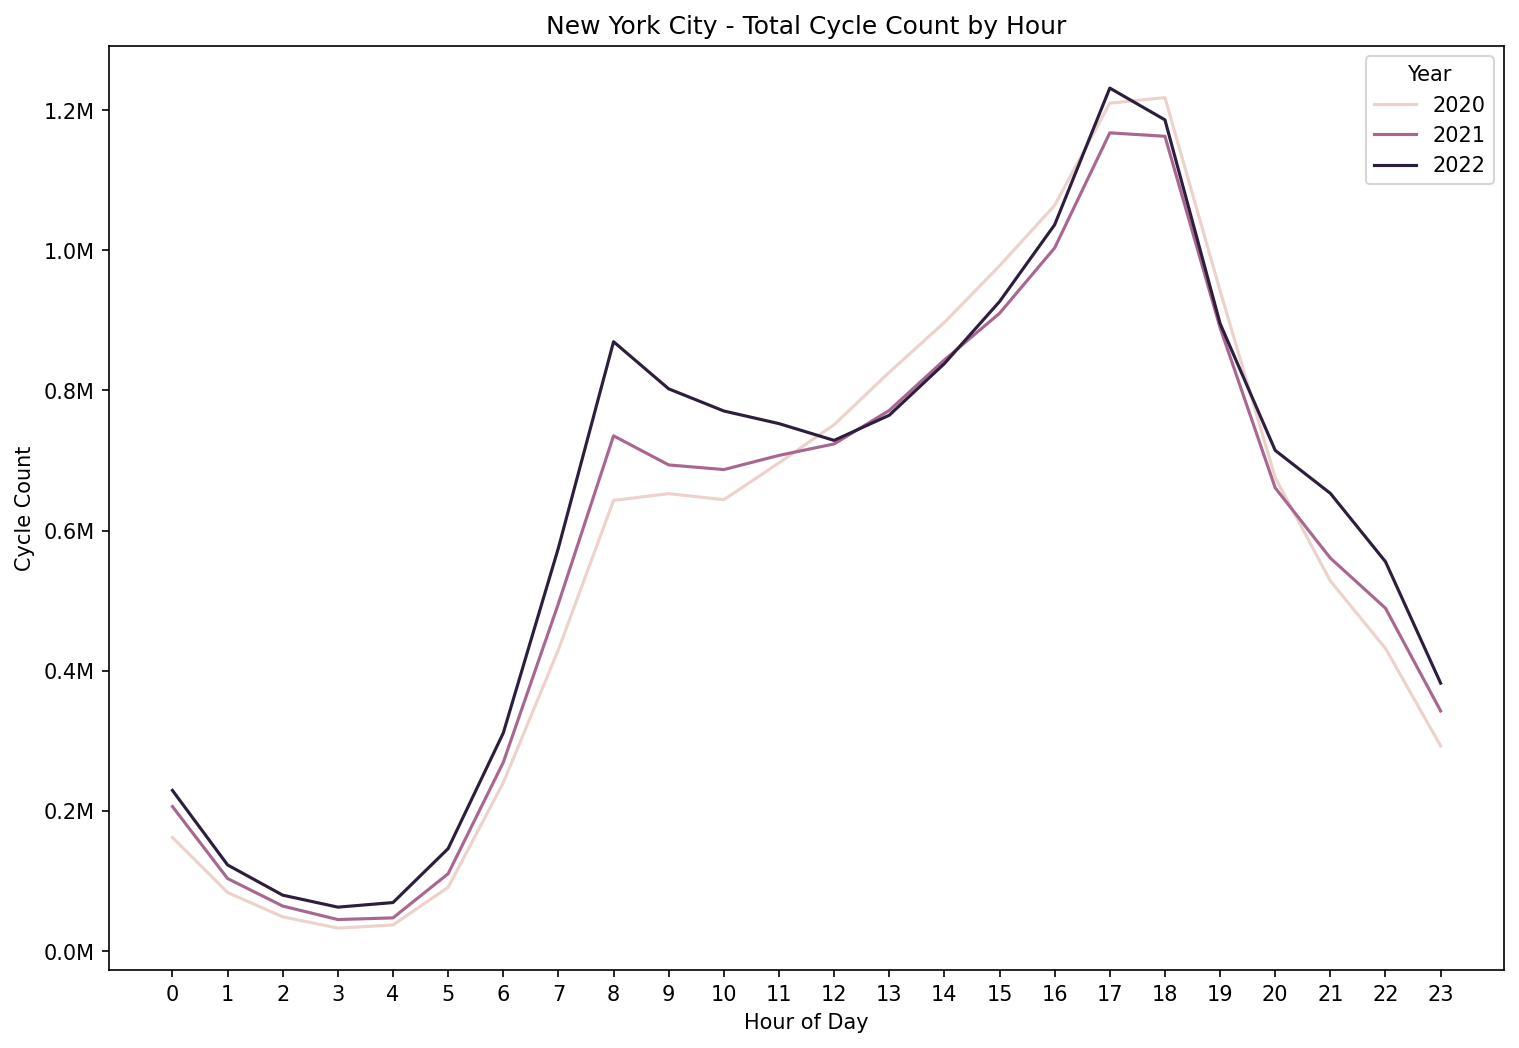

In [57]:
# Set plot size.
plt.figure(figsize=(12, 8), dpi=150)

# Create a lineplot.
ax = sns.lineplot(x='starthour', y='counts', hue='year', data=ny_shcount_gp, ci=None)

plt.title("New York City - Total Cycle Count by Hour")
plt.xlabel('Hour of Day')
plt.ylabel('Cycle Count')

ylabels = ['{:,.1f}'.format(x) + 'M' for x in ax.get_yticks()/1000000]
ax.set_yticklabels(ylabels)
ax.set_xticks(range(24))
plt.legend(title='Year', loc='best')

# 3. New York City Bike to Parking Ratio

In [58]:
# Extract columns to create new DataFrame.
ny_yavg = ny_count_sub.loc[:,['year', 'date', 'counts']]

# Add new column to reflect day/ month/ year.
ny_yavg['date'] = ny_yavg['date'].dt.strftime('%d/%m/%Y')

# Extract data from 2020 onwards.
ny_yavg = ny_yavg[ny_yavg['year']>=2020]
ny_yavg

,year,date,counts
0,2022,24/06/2022,15
1,2022,24/06/2022,12
2,2022,24/06/2022,14
3,2022,24/06/2022,5
4,2022,24/06/2022,10
...,...,...,...
4489735,2022,31/12/2022,13
4489736,2022,31/12/2022,1
4489737,2022,31/12/2022,3
4489738,2022,31/12/2022,8


In [59]:
# Group data by year and date, sum up to get total cycle count.
ny_day_gp = ny_yavg.groupby(['year','date'])[['counts']].sum().sort_values(['year','date'],ascending=True)
ny_day_gp.head()

counts
year date              
2020 01/01/2020   12500
     01/02/2020   19522
     01/03/2020   19522
     01/04/2020   21078
     01/05/2020   20353

In [60]:
# Group data by year, get daily average of total cycle count.
ny_y_mean = ny_day_gp.groupby(['year'])[['counts']].mean().sort_values(['year'],ascending=True).reset_index()
ny_y_mean['counts'] = ny_y_mean['counts'].astype('int')
ny_y_mean

,year,counts
0,2020,37096
1,2021,37509
2,2022,40288


In [61]:
# Get total sum of parking infrastructure count in New York City.
ny_parking_ttl.sum()

BoroName      BrooklynManhattanQueensBronxStaten Island
ASSETCOUNT                                        29836
dtype: object

In [62]:
# Create a new column to reflect bike to parking ratio, and update column datatypes.
ny_y_mean = ny_y_mean.assign(parking=29836)
ny_y_mean['bike_park_ratio'] = round(ny_y_mean['counts']/ny_y_mean['parking'],2)
ny_y_mean['bike_park_ratio'] = ny_y_mean['bike_park_ratio'].astype('float')
ny_y_mean['year'] = ny_y_mean['year'].astype('str')
ny_y_mean

,year,counts,parking,bike_park_ratio
0,2020,37096,29836,1.24
1,2021,37509,29836,1.26
2,2022,40288,29836,1.35


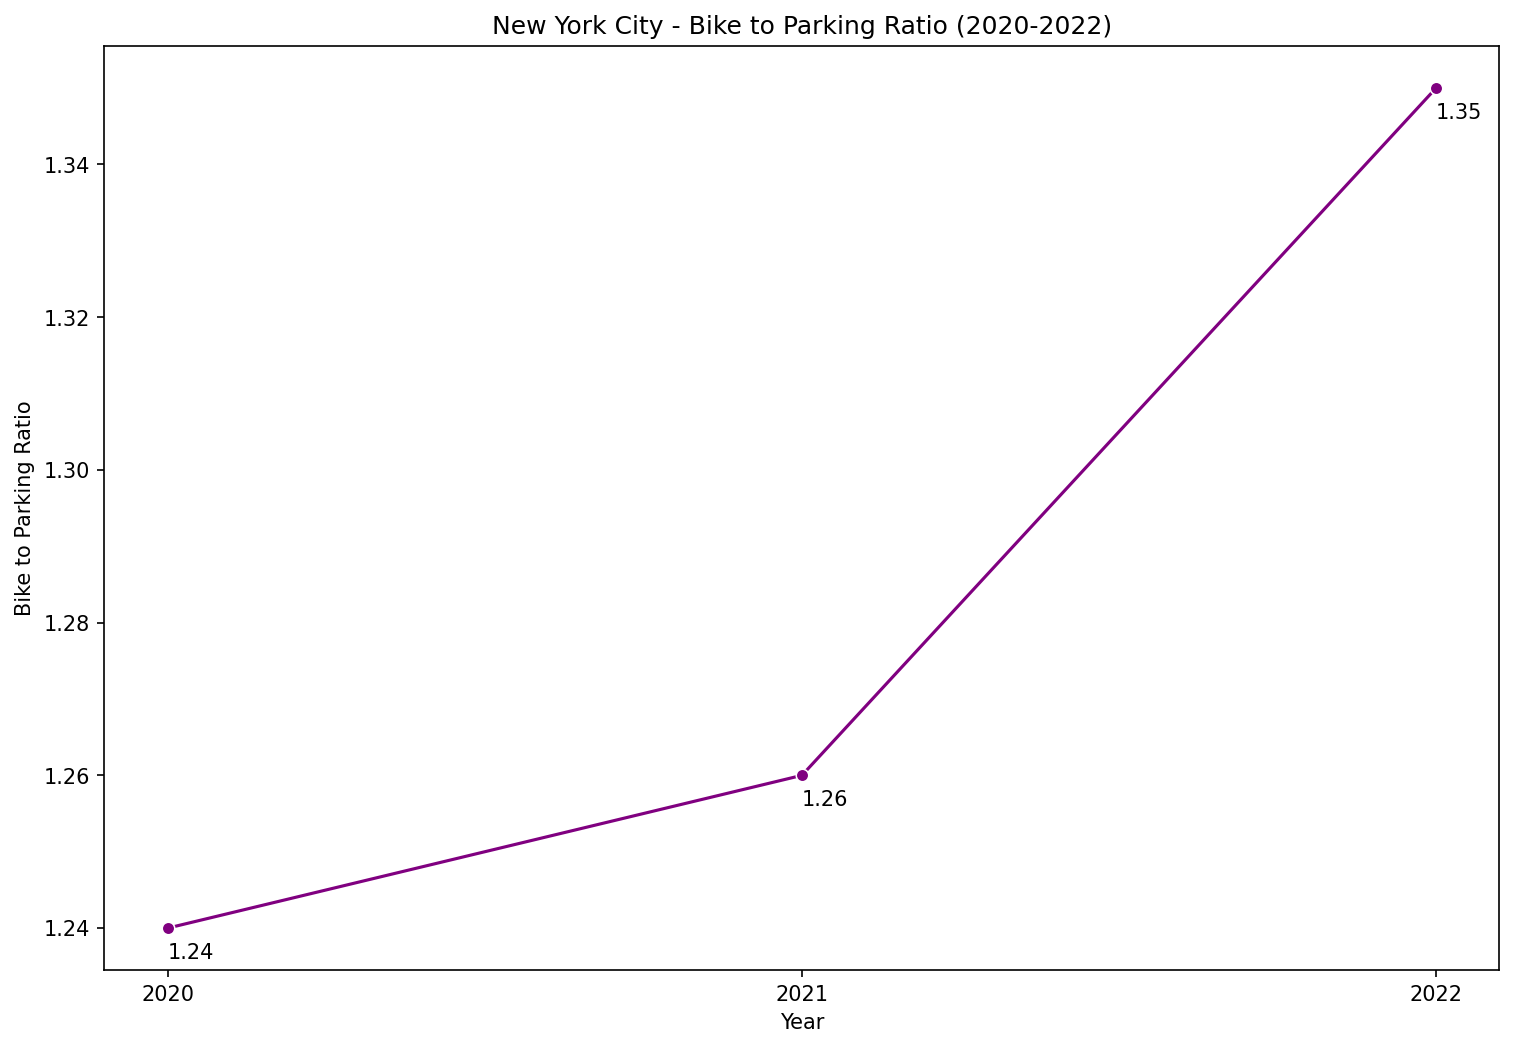

In [64]:
# Set plot size.
plt.figure(figsize=(12, 8), dpi=150)

# Create a lineplot.
ax = sns.lineplot(x='year', y='bike_park_ratio', color='purple', marker="o", data=ny_y_mean, ci=None)

plt.title("New York City - Bike to Parking Ratio (2020-2022)")
plt.xlabel('Year')
plt.ylabel('Bike to Parking Ratio')

# label points on the plot
for x, y in zip(ny_y_mean['year'], ny_y_mean['bike_park_ratio']):
# the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    ax.text(x=x, y=y-0.004, s='{:,.2f}'.format(y))

In [68]:
ny_parking_clean.to_csv(r'C:\Users\user\Desktop\NYC_Parking.csv', index=False)

In [72]:
ny_count_sub.to_csv(r'C:\Users\user\Desktop\NYC_BikeCount.csv', index=False)

In [71]:
ny_mcount.to_csv(r'C:\Users\user\Desktop\NYC_MonthlyCount.csv', index=False)